In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
rawdataset = pd.read_csv('hotel_bookings_raw.csv')
dataset = rawdataset[['hotel', 'is_canceled', 'lead_time', 'reserved_room_type', 'arrival_date_year','stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations']].copy()

dataset

hotel  is_canceled  lead_time reserved_room_type  \
0       Resort Hotel            0        342                  C   
1       Resort Hotel            0        737                  C   
2       Resort Hotel            0          7                  A   
3       Resort Hotel            0         13                  A   
4       Resort Hotel            0         14                  A   
...              ...          ...        ...                ...   
119385    City Hotel            0         23                  A   
119386    City Hotel            0        102                  E   
119387    City Hotel            0         34                  D   
119388    City Hotel            0        109                  A   
119389    City Hotel            0        205                  A   

        arrival_date_year  stays_in_weekend_nights  stays_in_week_nights  \
0                    2015                        0                     0   
1                    2015                        0                     0   
2                    2015                        0                     1   
3                    2015                        0                     1   
4                    2015                        0                     2   
...                   ...                      ...                   ...   
119385               2017                        2                     5   
119386               2017                        2                     5   
119387               2017                        2                     5   
119388               2017                        2                     5   
119389               2017                        2                     7   

        adults  children  babies country  is_repeated_guest  \
0            2       0.0       0     PRT                  0   
1            2       0.0       0     PRT                  0   
2            1       0.0       0     GBR                  0   
3            1       0.0       0     GBR                  0   
4            2       0.0       0     GBR                  0   
...        ...       ...     ...     ...                ...   
119385       2       0.0       0     BEL                  0   
119386       3       0.0       0     FRA                  0   
119387       2       0.0       0     DEU                  0   
119388       2       0.0       0     GBR                  0   
119389       2       0.0       0     DEU                  0   

        previous_cancellations  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
119385                       0  
119386                       0  
119387                       0  
119388                       0  
119389                       0  

[119390 rows x 13 columns]

<AxesSubplot:>

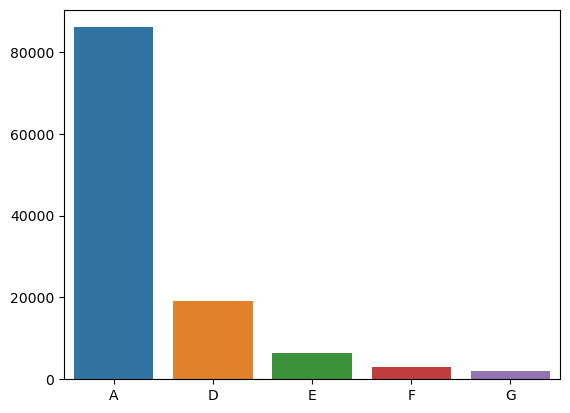

In [36]:
dataset['reserved_room_type'].value_counts().head(5)


sns.barplot(x=dataset['reserved_room_type'].value_counts().head(5).index, 
           y=dataset['reserved_room_type'].value_counts().head(5).values)

In [39]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'reserved_room_type',
       'arrival_date_year', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'country', 'is_repeated_guest',
       'previous_cancellations'],
      dtype='object')

   Year       variable  value
0  2016        Booking  38140
1  2017        Booking  27508
2  2015        Booking  13682
3  2016  Cancellations  15407
4  2017  Cancellations  11691
5  2015  Cancellations   6004


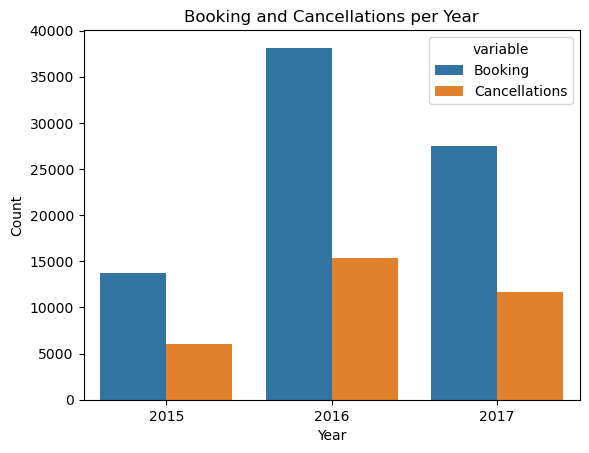

In [95]:
#Total number of accomodations per year of each hotel
CityHotelTotalperYear = dataset[(dataset['hotel'] == 'City Hotel' )]['arrival_date_year'].value_counts()
CityHotelCancelledperYear = dataset[(dataset['hotel'] == 'City Hotel' ) & (dataset['is_canceled']== 1)]['arrival_date_year'].value_counts()

CityHotelBookingStatsperYear = pd.DataFrame({
    'Year': CityHotelTotalperYear.index,
    'Booking': CityHotelTotalperYear.values,
    'Cancellations': CityHotelCancelledperYear.values
})

# Use pd.melt and assign the result to a new variable
melted_data = pd.melt(CityHotelBookingStatsperYear, id_vars='Year')

# Print the melted_data DataFrame
print(melted_data)

# Create a barplot with 'Year' on the x-axis, 'Booking' and 'Cancellations' as hues
sns.barplot(x='Year', y='value', hue='variable', data=pd.melt(CityHotelBookingStatsperYear, id_vars='Year'))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Booking and Cancellations per Year')

# Show the plot
plt.show()

In [70]:
dataset[(dataset['hotel'] == 'Resort Hotel' )]['arrival_date_year'].value_counts()


2016    18567
2017    13179
2015     8314
Name: arrival_date_year, dtype: int64